In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

env: DISPLAY=:1


/bin/bash: ../xvfb: No such file or directory


Observation space: Box(2,)
Action space: Discrete(3)


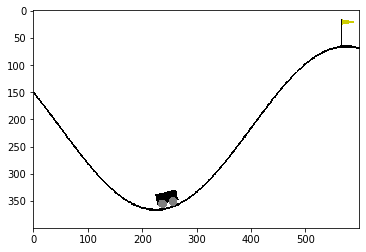

In [2]:
import gym
env = gym.make("MountainCar-v0")
env.reset()
plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

initial observation code: [-0.59928112  0.        ]
taking action 2 (right)
new observation code: [-0.59771837  0.00156275]
reward: -1.0
is game over?: False


<IPython.core.display.Javascript object>


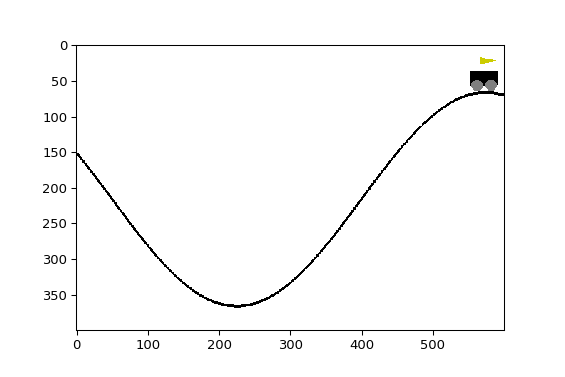

Exception ignored in: <function Viewer.__del__ at 0x000002702083D168>
Traceback (most recent call last):
  File "C:\Users\Pratyush\Anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 162, in __del__
    self.close()
  File "C:\Users\Pratyush\Anaconda3\lib\site-packages\gym\envs\classic_control\rendering.py", line 81, in close
    self.window.close()
  File "C:\Users\Pratyush\Anaconda3\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "C:\Users\Pratyush\Anaconda3\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "C:\Users\Pratyush\Anaconda3\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: (<weakref at 0x000002702ECCA458; to 'Win32Window' at 0x000002702EDA1508>,)


Well done!


In [4]:
obs0 = env.reset()
print("initial observation code:", obs0)
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t):
    if t>50 and t<100:
        return actions['left']
    else:
        return actions['right']


for t in range(TIME_LIMIT):
    
    # change the line below to reach the flag
    s, r, done, _ = env.step(policy(t))
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")